100%|██████████| 500/500 [00:17<00:00, 28.12it/s] 


Done with GA


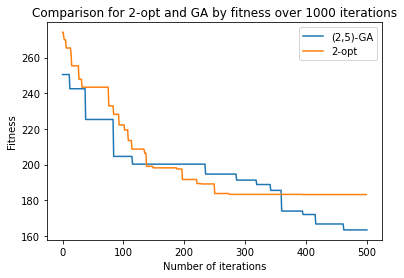

In [3]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

#print(os.getcwd())
#os.chdir(os.environ["HOME"]+"/natural-computing/assignment-1/")

def dist(node1, node2): 
    """Euclidean distance measure for nodes in TSP graph"""
    return math.sqrt((node1[0]-node2[0])**2+(node1[1]-node2[1])**2)

def fitness(ind):
    """Fitness of individual ind, computed by summing Euclidean distances between
    pairs of nodes."""
    total_dist = 0
    for i in range(1,  len(ind)):
        total_dist += dist(ind[i-1], ind[i])
    return total_dist

def mutate(ind):
    "Switch genes of individual at random indices"
    length = len(ind)
    p = np.random.randint(0, length)
    q = np.random.randint(0, length)
    ind[[p,q]] = ind[[q,p]]
    return ind

def crossover(ind1, ind2):
    """Perform random crossover operation between ind1 and ind2"""
    #@TODO: implement looparound
    length = len(ind1)
    p = np.random.randint(1, length)   
    q = np.random.randint(p, length)
    # Ensure q > p
    
    cross1 = ind2[p:q]  # Slice crossover section
    cross2 = ind1[p:q]

    add1 = np.array([n.tolist() for n in ind2 if n.tolist() not in cross1.tolist()]) # Get all genes in parent that are not in crossover part
    add2 = np.array([n.tolist() for n in ind1 if n.tolist() not in cross2.tolist()])
    
    
    child1 = np.vstack((add1[:p], cross1, add1[p:]))  # Add parent genes to crossover in order
    child2 = np.vstack((add2[:p], cross2, add2[p:])) 
        
    return child1, child2
    
    
def n_opt(problem, n=2, n_gen=500):
    """Apply n-opt to the solution. This is effectively slicing the full path into n+1 pieces, and then
    recombining those pieces. If the full path is a cycle, then two slices need to be made, if it is not then 
    one slice suffices."""
    candidates = []
    fitness_list = []
    solution = np.random.permutation(problem)
    
    for i in range(n_gen):
        # Decide how to recombine
        p = np.random.randint(len(problem)-1)
        q = np.random.randint(len(problem)-1)
        part1 = solution[:p]
        part2 = solution[p:q]
        part3 = solution[q:]
        arr = np.array([part1, part2, part3], dtype="object")
        perm = np.random.permutation(3)
        n_opt = arr[perm]
        n_opt = np.vstack(n_opt)
    
        if fitness(n_opt) <= fitness(solution):
              solution = n_opt
        fitness_list.append(fitness(solution))
    return fitness_list
    
with open("file-tsp.txt") as file:
    nodes = [file.readline().strip().split() for line in file]
    nodes = np.array([np.array(tuple(map(float, node))) for node in nodes])

def run_ga(problem, gen_size = 2, pop_size = 2, n_gen =500):
    candidates = []
    mutation_prob = 0.05
    fitness_list = []
    for i in range(pop_size):
        candidates.append(np.random.permutation(problem))
   
    for n in tqdm(range(n_gen)):
        c_sort = sorted(candidates, key=lambda x: fitness(x), reverse=False)
        c_sort = c_sort[:4]
        fitness_list.append(fitness(c_sort[0]))   # Allow best 2 parents to procreate
        parent1 = c_sort[0]
        parent2 = c_sort[1]
        
        for i in range(int(pop_size/2)):
            child1, child2 = crossover(parent1, parent2)
            if np.random.random() < mutation_prob:
                child1 = mutate(child1)
            if np.random.random() < mutation_prob:
                child2 = mutate(child2)
            candidates.append(child1)
            candidates.append(child2)
            
    c_sort = sorted(candidates, key=lambda x: fitness(x), reverse=False)
    fitness_list.append(fitness(c_sort[0]))
    print("Done with GA")
    return fitness_list

# Do a plot
plt.plot(run_ga(nodes), label = "(2,5)-GA")
plt.plot(n_opt(nodes), label="2-opt")
plt.xlabel("Number of iterations")
plt.ylabel("Fitness")
plt.title("Comparison for 2-opt and GA by fitness over 1000 iterations")
plt.legend()
plt.show()